In [1]:
import datetime
import random
import time

import baostock as bs
import pandas as pd

from tqdm import tqdm

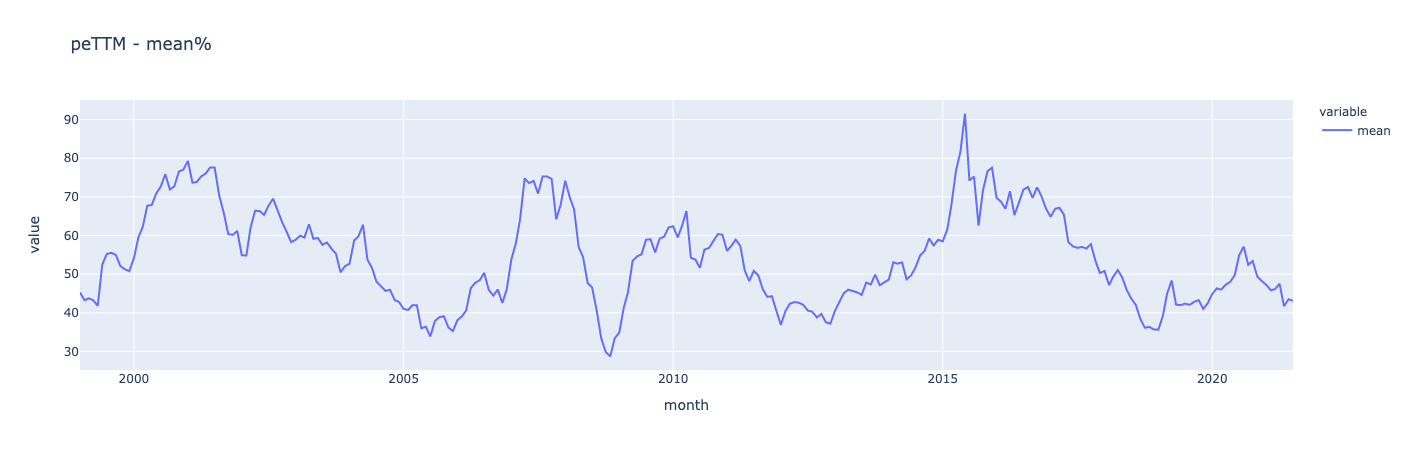

In [31]:
# 读取市盈率，过滤掉负值和异常值
file_path = 'data/peTTM.csv.zip'
pe_raw = pd.read_csv(file_path)
pe = pe_raw[pe_raw['peTTM'] > 1]
pe = pe[pe['peTTM'] < 200]

# 计算月度平均的统计值
pe_month = pe
pe_month['month'] = pe_month['date'].str.slice(0, 7)
pe_month_stats = pe_month.groupby(['month', 'code'])['peTTM'].agg(['min', 'mean', 'max']).reset_index()
pe_month_describe = pe_month_stats.groupby(['month'])['mean'].describe()
pe_month_25 = pe_month_describe['50%']
pe_month_50 = pe_month_describe['50%']
pe_month_75 = pe_month_describe['75%']
pe_month_mean = pe_month_describe['mean']

# 作图
import plotly.express as px

fig = px.line(pe_month_mean, title='peTTM - mean%')
fig.show()
# fig = px.line(pe_month_50, title='peTTM - 50%')
# fig.show()
# fig = px.line(pe_month_75, title='peTTM - 75%')
# fig.show()

login success!


,sz.002024,50%,75%
month,,,
2005-07,27.660442,23.365679,37.886429
2007-08,78.569576,63.588940,97.320425
2008-10,21.503875,20.429539,32.499288
2010-04,28.672901,55.965259,85.030601
2012-12,12.506971,27.323280,42.176669
2015-06,147.197241,80.804711,130.791104
2018-10,11.346166,26.063558,43.358041
2019-01,10.274963,26.350263,42.608882
2020-01,5.070383,32.944753,56.937157


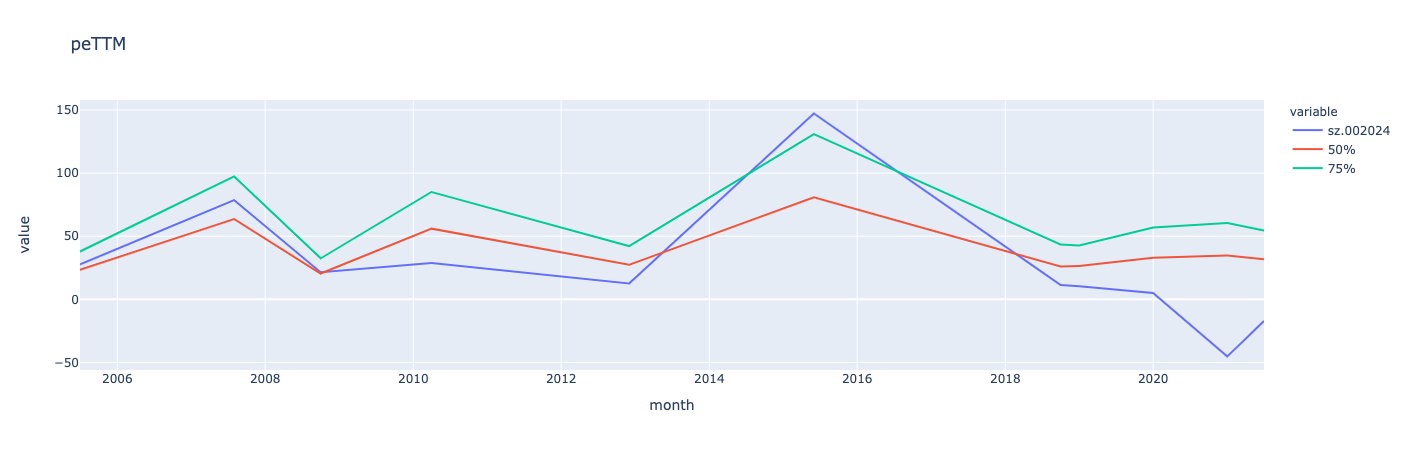

In [32]:
# 输出个股历史的市盈率
code = 'sz.002024'

last_month = datetime.date.today().isoformat()[:7]
key_date = ['1999-05', '2001-06', '2002-09', '2005-07', '2007-08', '2008-10', '2010-04', '2012-12', '2015-06', '2018-10',
            '2019-01', '2020-01', '2021-01', last_month]

start = '1999-05-01'
end = datetime.date.today().isoformat()

bs.login()
rs = bs.query_history_k_data_plus(code, "date,code,close,peTTM", start, end, adjustflag="2")
stock_pe = rs.get_data()
bs.logout

stock_pe_month = stock_pe
stock_pe_month['month'] = stock_pe_month['date'].str.slice(0, 7)
stock_pe_month['peTTM'] = pd.to_numeric(stock_pe_month['peTTM'])
stock_month_stats = stock_pe_month.groupby(['month'])['peTTM'].agg(['mean'])

df = pd.concat([stock_month_stats, pe_month_50, pe_month_75], axis=1).reindex(key_date).sort_index().dropna().rename(columns={"mean": code})
display(df)

fig = px.line(df, title='peTTM')
fig.show()

In [92]:
bs.login()

rs = bs.query_trade_dates(start_date=start_date, end_date=end_date)
print_error(rs)
df = rs.get_data()
trading_day = df[df['is_trading_day'] == '1']['calendar_date']

login success!


In [24]:
df.loc['2014-02']

mean     5.087283
50%     40.640330
75%     70.729001
Name: 2014-02, dtype: float64

In [44]:
rs.get_data()['type'].iloc[0] != '1'

'1'

In [6]:
stock_rs = bs.query_all_stock(end_date)

,date,code,peTTM
0,1999-01-04,sh.600001,12.507194
1,1999-01-04,sh.600002,15.482130
2,1999-01-04,sh.600009,37.231581
3,1999-01-04,sh.600051,31.467721
4,1999-01-04,sh.600052,27.401695
...,...,...,...
253865,2008-06-04,sz.399007,NaN
253866,2008-06-04,sz.399319,NaN
253867,2008-06-04,sz.399361,NaN
253868,2008-06-04,sz.399364,NaN


In [30]:
code = 'sh.600036'
date = '2020-06-01'
bs.login()
rs = bs.query_history_k_data_plus(code, "date,code,close,peTTM", date, date, adjustflag="2")
print(rs.get_data())
bs.logout

login success!
         date       code          close     peTTM
0  2020-06-01  sh.600036  33.7730322400  9.202857


<function baostock.login.loginout.logout(user_id='anonymous')>

In [33]:
k_rs = bs.query_history_k_data_plus(code, "date,code,peTTM", '1999-01-01', '2021-07-04')

In [32]:
bs.login()

login success!


In [26]:
pe_month_mean

month
1999-01    45.255914
1999-02    43.233693
1999-03    43.749907
1999-04    43.242522
1999-05    41.798358
             ...    
2021-03    46.102814
2021-04    47.531086
2021-05    41.713376
2021-06    43.514102
2021-07    43.096183
Name: mean, Length: 271, dtype: float64

In [45]:
bs.login()
code = 'sz.000651'
k_rs = bs.query_history_k_data_plus(code, "date,code,close,peTTM", '2017-01-01', '2018-01-01')
df = k_rs.get_data()
bs.logout()

login success!
logout success!


In [46]:
df

,date,code,close,peTTM
0,2017-01-03,sz.000651,25.0600,10.917272
1,2017-01-04,sz.000651,25.1400,10.952124
2,2017-01-05,sz.000651,25.2600,11.004401
3,2017-01-06,sz.000651,25.0000,10.891133
4,2017-01-09,sz.000651,24.7400,10.777866
...,...,...,...,...
239,2017-12-25,sz.000651,45.4100,13.900152
240,2017-12-26,sz.000651,44.6600,13.670575
241,2017-12-27,sz.000651,43.1800,13.217542
242,2017-12-28,sz.000651,43.7400,13.388960


In [ ]:
# 更新数据库
start_date = '1999-01-01'
end_date = '2021-07-02'

file_path = 'data/peTTM.csv.zip'

def print_error(rs):
    if rs.error_code != '0':
        print('respond error_code:'+rs.error_code)
        print('respond  error_msg:'+rs.error_msg)

        
bs.login()
stock_rs = bs.query_all_stock(end_date)
print_error(stock_rs)
stock_df = stock_rs.get_data()

data_df = pd.read_csv(file_path)
existing_code = data_df['code'].unique()

for i, code in enumerate(tqdm(stock_df["code"])):
    # skip already processed stock
    if code in existing_code:
        continue 
    
    # only process stock
    rs = bs.query_stock_basic(code=code)
    print_error(rs)    
    if rs.get_data()['type'].iloc[0] != '1':
        continue      
        
    k_rs = bs.query_history_k_data_plus(code, "date,code,peTTM", start_date, end_date)
    print_error(k_rs)
    
    data_df = data_df.append(k_rs.get_data())    
    if i % 100 == 0:
        data_df.to_csv(file_path, index=False)    
    time.sleep(random.random())

bs.logout()